# Проєкт на тему:
# *"Порівняльний аналіз рекламної кампанії в індустрії відеоігор"*

використаний датасет:
https://www.kaggle.com/datasets/kendallgillies/video-game-sales-and-ratings

### Ціль
Виявити визначальні успішність гри закономірності та для кожного з трьох регіонів (NA, Europe, JP) вибрати ігри для рекламних кампаній.

### Опис даних

Рада з оцінки розважального програмного забезпечення (ESRB) оцінює вміст гри та призначає вікові категорії

— Name (Ім'я)

— Platform (Платформа)

— Year_of_release (Рік_випуску)

— Genre (Жанр)

— Publisher (Видавець)

— NA_sales (обсяг продажів у Північній Америці)

— EU_sales (продажі в Європі)

— JP_sales (продажі в Японії)

— Other_sales (продажі в інших країнах)

— Global_sales (сумарні продажі)

— Critic_Score (оцінка критиків)

— Critic_Count (підрахунок оцінки критиків)

— User_Score (оцінка користувачів)

— User_Count (підрахунок оцінки користувачів)

— Рейтинг (ESRB)
    - Е: всі;
    - E10+: кожен 10+;
    - Т: Підліток;
    - М: Зрілі 17+;
    - A: Тільки для дорослих 18+;
    - RT: рейтинг очікується.
    - RT: рейтинг очікується.
    - K-A: усі (старий).




### Імпорт бібліотек

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import seaborn as sns

from scipy import stats as st

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

pd.set_option('display.max_rows', None)

print("Setup Complete")

Setup Complete


## Завантаження даних

In [2]:
df = pd.read_csv('Video_Game_Sales_as_of_Jan_2017.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
5,Tetris,G,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,87.0,80.0,8.4,595.0,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN


 Примітки щодо попередньої обробки:
- Ми бачимо "NaN" в останніх 5 стовпцях;
- Тип даних `Year_of_Release` слід змінити на цілочисельний.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


Примітки щодо попередньої обробки даних:
- Набір даних містить більше 17 тисяч спостережень і 15 стовпців;
- у стовпцях `Name`, `Platform`, `Genre`, `Publisher` і `Rating` відсутні значення;
- Усі назви стовпців потрібно перетворити на малі літери.

In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,17408.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,8336.000000,8336.000000,7798.000000,7798.000000
mean,2006.630859,0.254534,0.140727,0.075020,0.045908,0.516469,68.912548,26.192059,7.117056,162.672480
std,5.901598,0.800673,0.497341,0.303412,0.183932,1.526124,13.964937,18.991526,1.502410,562.837954
min,1976.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.050000,60.000000,11.000000,6.400000,10.000000
50%,2008.000000,0.070000,0.020000,0.000000,0.010000,0.160000,71.000000,21.000000,7.500000,25.000000
75%,2011.000000,0.230000,0.100000,0.030000,0.030000,0.450000,79.000000,36.000000,8.200000,81.000000
max,2017.000000,41.360000,28.960000,10.220000,10.570000,82.540000,98.000000,113.000000,9.700000,10766.000000


###### Примітки щодо попередньої обробки даних:
- `Year_of_Release` коливається від 1976 до 2017, середня гра була випущена в 2006 році, а більшість з них - в 2008. Оскільки ми не бачимо великої різниці між середніми та середніми значеннями, а стандартне відхилення досить низьке, ми можемо вважати, що розподіл цієї змінної близький до нормального;
- Усі змінні продажів мають мінімальне значення 0, його слід перевірити та виправити, якщо необхідно. Усі вони виглядають як дуже сильно спотворені розподіли – навіть третій квартиль становить менше 1 мільйона доларів США, тоді як максимальне значення становить від 11 до 42 мільйонів. Ці розподіли також слід додатково проаналізувати за допомогою прямокутних графіків для перевірки викидів;
- `Critic_Score` коливається від 13 до 98. Середня оцінка близька до 67, середнє значення близько 71, стандартне відхилення розумне - 14, тому можна вважати, що цей розподіл близький до нормального.

### Попередня обробка
#### Імена стовпців приводимо до нижнього регістру 

In [7]:
df.columns = df.columns.str.lower()

#### Відсутні значення

In [8]:
df.isnull().sum()/len(df)

name               0.000000
platform           0.000000
year_of_release    0.000459
genre              0.000000
publisher          0.000057
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
global_sales       0.000000
critic_score       0.521360
critic_count       0.521360
user_score         0.552251
user_count         0.552251
rating             0.411346
dtype: float64

##### Рік випуску

In [9]:
df[df['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,rating
12795,Mobile Ops: The One Year War,X360,NaN,Simulation,Namco Bandai Games,0.0,0.0,0.06,0.0,0.06,NaN,NaN,NaN,NaN,NaN
14210,Housekeeping,DS,NaN,Action,Unknown,0.0,0.0,0.04,0.0,0.04,NaN,NaN,NaN,NaN,NaN
14532,Fullmetal Alchemist: Brotherhood,PSP,NaN,Action,Unknown,0.0,0.0,0.03,0.0,0.03,NaN,NaN,NaN,NaN,NaN
15162,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02,NaN,NaN,NaN,NaN,NaN
15784,Writing and Speaking Beautiful Japanese DS,DS,NaN,Misc,Unknown,0.0,0.0,0.02,0.0,0.02,NaN,NaN,NaN,NaN,NaN


Згідно з нашим попереднім аналізом, розподіл `year_of_release` близький до нормального. Потім ми замінимо відсутні значення середнім для жанру та платформи.

In [10]:
df['year_of_release'] = df.groupby(['platform','genre'])['year_of_release'].apply(lambda x: x.fillna(x.mean()))

In [11]:
df['year_of_release'].isnull().sum()

0

Давайте змінимо тип даних на ціле число, оскільки роки не мають типу з плаваючою точкою.

In [12]:
df['year_of_release'] = np.floor(df['year_of_release']).astype(int)

##### Оцінки

У деяких іграх відсутні  результати. Ці ігри були випущені на старих консолях, які вже практично не використовуються. Крім того, наша мета – побудувати прогноз на 2017 рік, тому дані 80-х років не будуть дуже корисними. Ми збережемо ці цінності такими, якими вони є, і приймемо рішення, як з ними поводитися пізніше, якщо нам це знадобиться.

Для решти відсутніх значень ми заповнимо їх на основі доступного стовпця балів. Якщо кореляція між `critic_score` і `user_score` достатньо висока, тоді ми можемо просто вибрати певну гру, шукати ігри з подібною оцінкою користувача (плюс/мінус 0,5 бали) -- отримати масив таких ігор, а потім просто взяти середнє значення для `critic_score`.

По-перше, потрібно буде змінити тип даних `user_score` з object на float.

In [13]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 8.8, 7.5, 2.6,
       7.2, 7. , 9.2, 7.3, 4.9, 4.3, 6.5, 7.6, 5.7, 9.1, 6.9, 9.4, 6.8,
       3.5, 6.1, 5.4, 4. , 6.2, 4.5, 9.3, 4.2, 6. , 6.7, 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 5.9, 4.6, 3.9, 3.1, 2.9, 5.2, 5. , 5.1, 3.3, 4.7,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 9.6, 1.8, 3.8,
       0. , 1.6, 2.4, 1.7, 1.1, 1. , 0.3, 1.5, 1.2, 0.2, 2.3, 0.5, 1.3,
       0.6, 1.4, 0.9, 0.7, 9.7])

Тепер давайте перевіримо кореляцію між двома стовпцями.

In [14]:
df['critic_score'] = (df['critic_score'].astype(float))
df['user_score'] = df['user_score'].astype(float)
df['user_score'].corr(df['critic_score'])


0.5827053393064371

Показник кореляції досить високий, тому ми можемо використовувати підхід, згаданий вище. Ми заповнимо відсутні значення в стовпці `user_score` за допомогою стовпця `critic_score`.

In [15]:
df['user_score'] = df.groupby('critic_score')['user_score'].apply(lambda x: x.fillna(x.median()))

In [16]:
df['user_score'] = df.groupby('rating')['user_score'].apply(lambda x: x.fillna(x.median()))
df['critic_score'] = df.groupby('rating')['critic_score'].apply(lambda x: x.fillna(x.median()))

Тепер давайте подивимося, чи є ігри, які продаються на різних платформах. Якщо рейтинг заповнений на одній із платформ, ми можемо заповнити відсутній рейтинг і на інших платформах.

In [17]:
df['user_score'] = df.groupby('name')['user_score'].apply(lambda x: x.fillna(x.mean()))
df['critic_score'] = df.groupby('name')['critic_score'].apply(lambda x: x.fillna(x.mean()))
df['rating'] = df.groupby('name')['rating'].apply(lambda x: x.fillna(x.mode()))

In [18]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
publisher             1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       6732
critic_count       9080
user_score         6732
user_count         9618
rating             7164
dtype: int64

Наразі ми збережемо решту відсутніх значень.

#### Дублікати
Давайте перевіримо, чи дублюються рядки в будь-яких фреймах даних.

In [19]:
df.duplicated().sum()

0

#### Зміна типу даних

In [20]:
df.dtypes

name                object
platform            object
year_of_release      int32
genre               object
publisher           object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
global_sales       float64
critic_score       float64
critic_count       float64
user_score         float64
user_count         float64
rating              object
dtype: object

Усі змінні тепер мають правильні типи даних.

### Пошуковий аналіз даних

#### Усі платформи. Розшлянемо скільки ігор випускалось в різні роки

In [21]:
games_pivot_by_year = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
games_pivot_by_year

,name
year_of_release,
1976,1
1977,3
1978,4
1979,1
1980,14
1981,46
1982,37
1983,18
1984,14


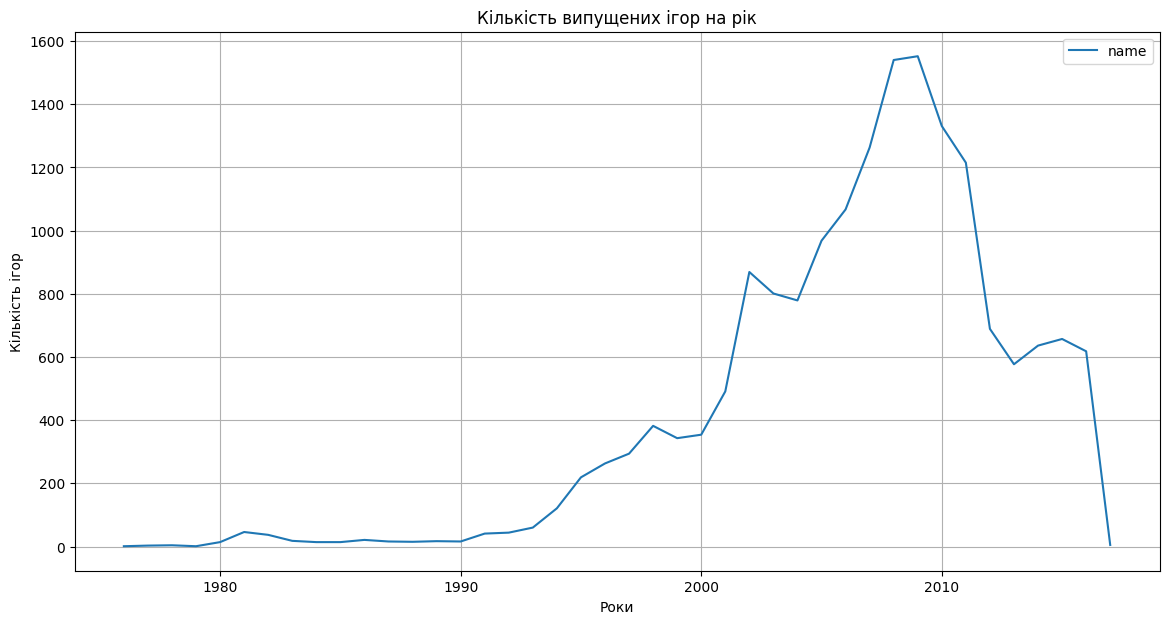

In [22]:
plot = games_pivot_by_year.plot(figsize=(14,7), legend=True, grid=True, title='Кількість випущених ігор на рік')
plot.set_xlabel('Роки'), plot.set_ylabel('Кількість ігор')
print()

Більшість ігор у цьому наборі даних були випущені приблизно в 2009-2012 роках. Кількість ігор, випущених до 21 століття, не дуже значна.

##### Загальний обсяг продажів на платформу

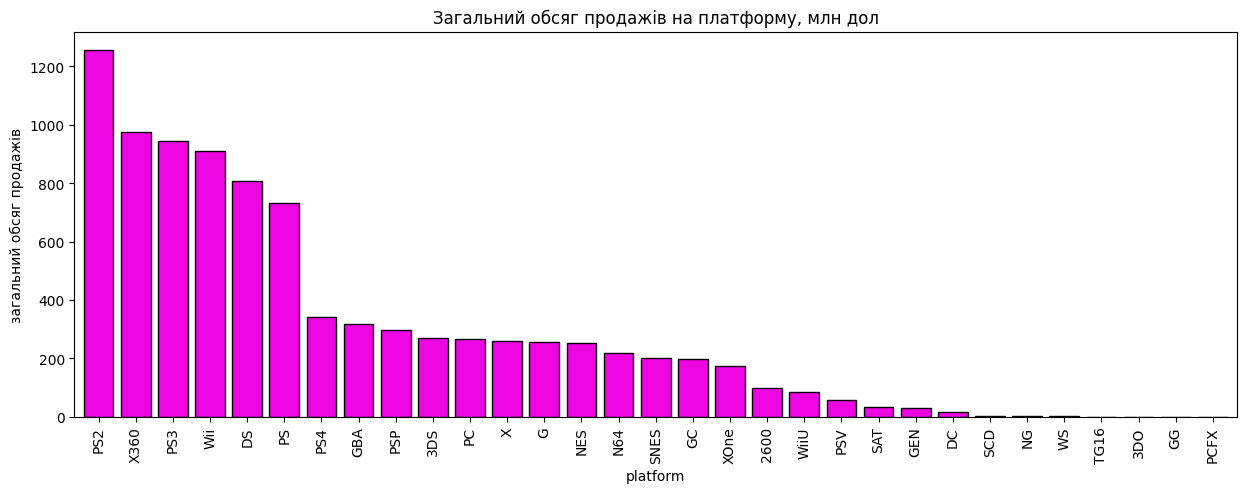

In [23]:
plt.figure(figsize=(15,5))
df.groupby('platform')['global_sales'].sum().sort_values(ascending=False).plot(kind='bar', ec='black', width=0.8, color='#ed05e2')
plt.title('Загальний обсяг продажів на платформу, млн дол')
plt.ylabel('загальний обсяг продажів');

Існує 6 платформ, які виділяються за загальним обсягом продажів у всіх регіонах: «PS2», «X360», «PS3», «Wii», «DS», «PS». Давайте створимо окремі дистрибутиви для кожного з них, щоб побачити, скільки ігор було випущено щороку.

##### Динаміка реалізацій ігор по платформах

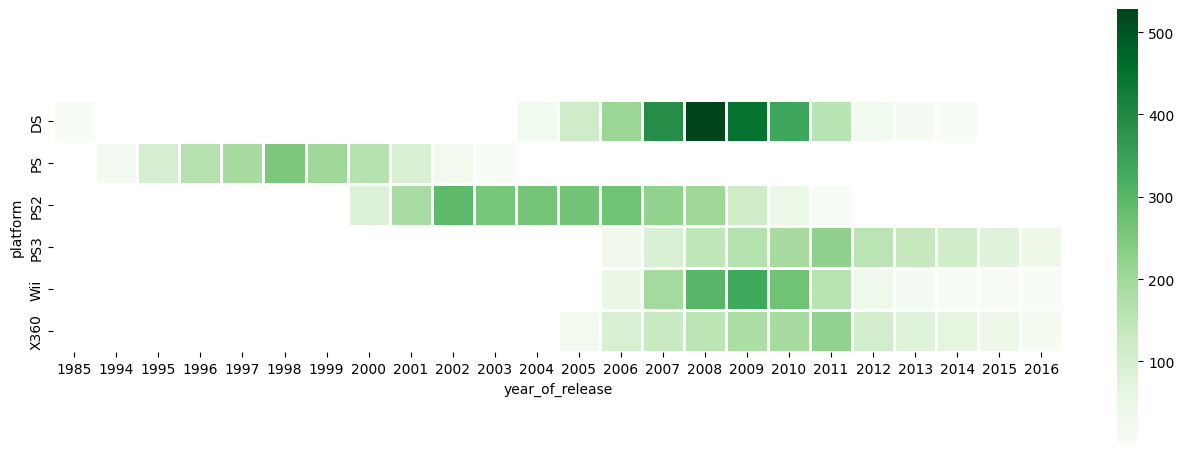

In [24]:
df_platform_year = df[df['platform'].isin(['PS2','X360','PS3','Wii','DS','PS'])].groupby(["platform","year_of_release"]).size().unstack()

plt.figure(figsize=(14,10))
g = sns.heatmap(
    df_platform_year, 
    square=True,  # зробити клітинки квадратними
    cbar_kws={'fraction' : 0.02},  # зменшити кольорову панель
    cmap='Greens',  # використовуйте карту зелених кольорів
    linewidth=1  # проміжок між клітинками
)

З цих 6 платформ лише 3 все ще мають продажі — «X360», «PS3» і «Wii» (дуже низька сума з 2012 по 2016 рік). Інші 3 платформи були дуже популярними, але зараз (yf початок 2017р) продажі нульові. У середньому на появу нових платформ і зникнення старих потрібно близько 10 років. Якщо ми хочемо скласти прогноз на подальший 2017 рік, нам потрібно визначити ті платформи, які все ще популярні на кінець 2016 року. Середній період життя платформи, коли вона перебуває на піку популярності, становить 5 років від початку, тому ми візьмемо дані для за останні 5 років для побудови прогнозу на 2017 рік.

In [25]:
df_final = df[df['year_of_release'] >= 2012]
df_final.shape

(3182, 15)

##### Вибір найпопулярніших платформ

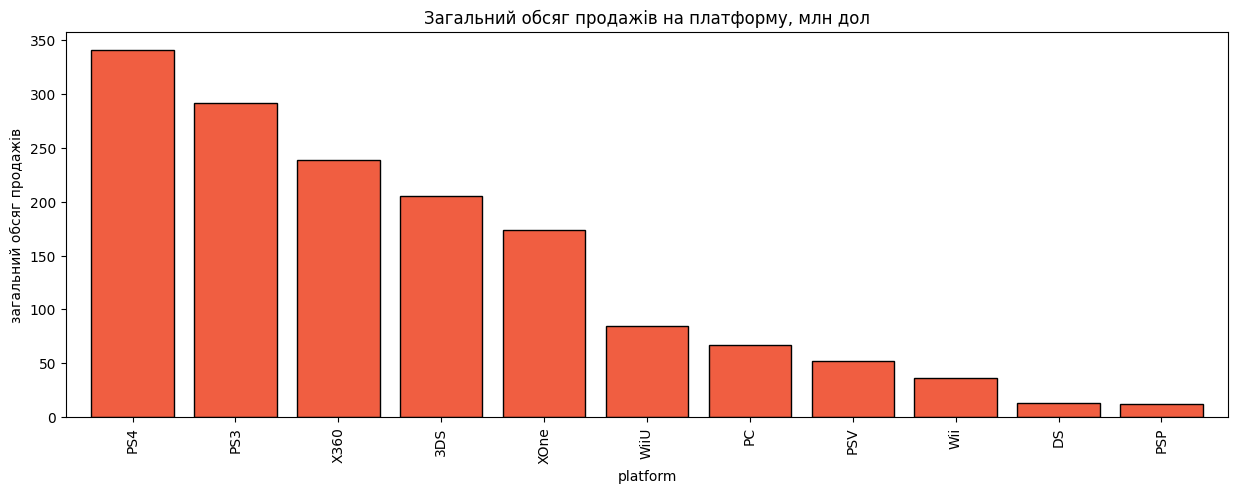

In [26]:
plt.figure(figsize=(15,5))
df_final.groupby('platform')['global_sales'].sum().sort_values(ascending=False).plot(kind='bar', ec='black', width=0.8, color='#f05e41')
plt.title('Загальний обсяг продажів на платформу, млн дол')
plt.ylabel('загальний обсяг продажів');

У цьому фреймі даних лідирують у продажах наступні 5 платформ: «PS4», «PS3», «X360», «3DS», «XOne». Виберемо їх для подальшого аналізу.

Тепер ми створимо коробковий графік для глобальних продажів усіх ігор, розбитих за платформами, щоб побачити, чи є якісь відмінності в продажах.

#### Кращі платформи. Різниця в продажах між платформами

In [27]:
df_top_platforms = df[df['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])]

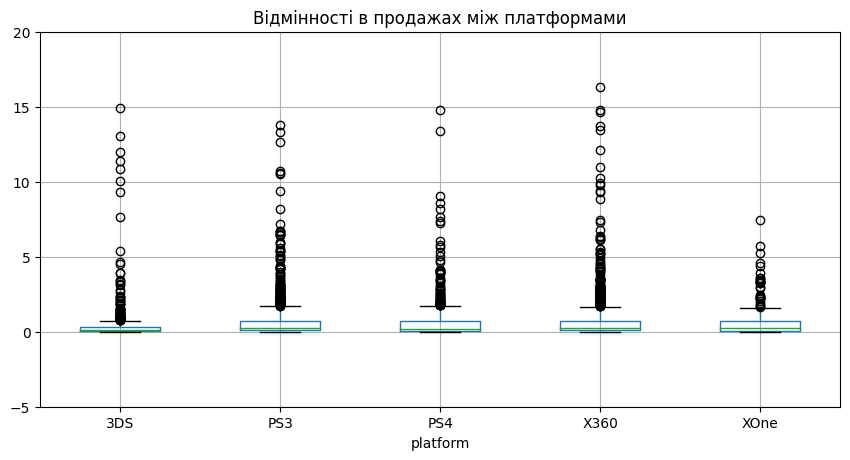

In [28]:
df_top_platforms.boxplot(by='platform', column='global_sales')
plt.suptitle('')
plt.ylim(-5, 20)
plt.title('Відмінності в продажах між платформами')
plt.gcf().set_size_inches(10, 5);

Всі коробкові ділянки виглядають схожими, суттєвих відмінностей в продажах немає. Усі розподіли мають позитивний перекіс. Розрахуємо медіану та середнє значення для кожної платформи.

In [29]:
df_top_platforms.pivot_table(index='platform', values='global_sales', aggfunc=['median','mean'])

,median,mean
,global_sales,global_sales
platform,,
3DS,0.110,0.489946
PS3,0.260,0.692577
PS4,0.185,0.803750
X360,0.270,0.751533
XOne,0.215,0.658409


Середні значення набагато вищі за медіани, що має сенс, оскільки розподіли позитивно спотворені, як ми помітили раніше.

Тепер давайте подивимося, як відгуки користувачів і професіоналів впливають на продажі найпопулярнішої (за продажами) платформи — «PS4».

In [30]:
games_pivot_by_platform = df.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = ['min', 'max'])

games_pivot_by_platform['platform_years'] = games_pivot_by_platform[('max', 'year_of_release')] - games_pivot_by_platform[('min', 'year_of_release')]
display(games_pivot_by_platform.sort_values(by = 'platform_years', ascending = False).head())
platform_years = games_pivot_by_platform['platform_years'].mean()
print(f'Середній час існування платформи: {platform_years:.1f} років')

,min,max,platform_years
,year_of_release,year_of_release,
platform,,,
PC,1985,2016,31
DS,1985,2014,29
2600,1976,1992,16
G,1988,2001,13
N64,1996,2008,12


Середній час існування платформи: 8.5 років


Побудовано розподіл по 5 платформах з найбільшим продажем ігор для них. Середня тривалість існування платформи: 8.5 років.

##### Співвідношення між продажами та відгуками

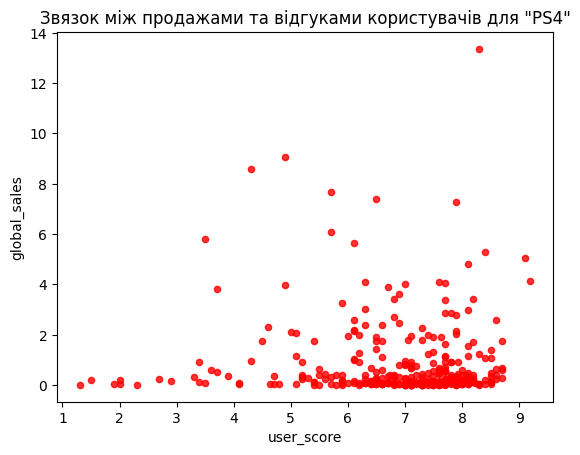

In [31]:
ps4 = df_final[df_final['platform']=='PS4']
ps4.plot.scatter(y='global_sales', x='user_score', alpha=.8, color='red')
plt.title('Звязок між продажами та відгуками користувачів для "PS4"');

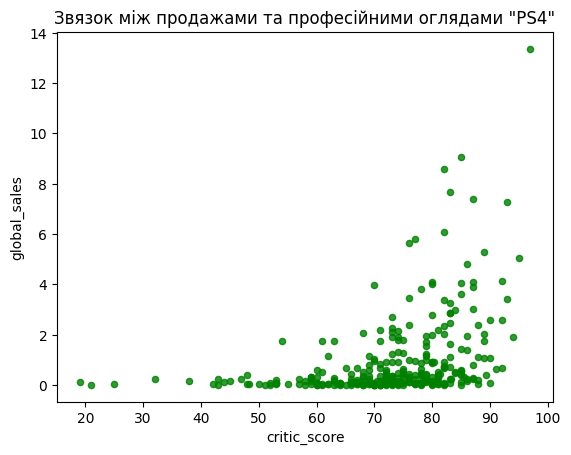

In [32]:
ps4.plot.scatter(y='global_sales', x='critic_score', alpha=.8, color='green' )
plt.title('Звязок між продажами та професійними оглядами "PS4"');

In [33]:
print('Коефіцієнт кореляції Пірсона між продажами та відгуками користувачів: {:.0%}'.format(ps4['global_sales'].corr(ps4['user_score'])))

Коефіцієнт кореляції Пірсона між продажами та відгуками користувачів: -3%


In [34]:
print('Коефіцієнт кореляції Пірсона між продажами та професійними оглядами: {:.0%}'.format(ps4['global_sales'].corr(ps4['critic_score'])))

Коефіцієнт кореляції Пірсона між продажами та професійними оглядами: 39%


На основі діаграм розкиду та коефіцієнтів Пірсона майже немає лінійного зв’язку між продажами та відгуками користувачів і досить слабкий позитивний лінійний зв’язок між продажами гри та професійними відгуками для платформи «PS4».

#### Ігри продаються на кількох платформах

Давайте порівняємо загальні продажі 10 найкращих ігор, які продаються на 3 найкращих платформах.

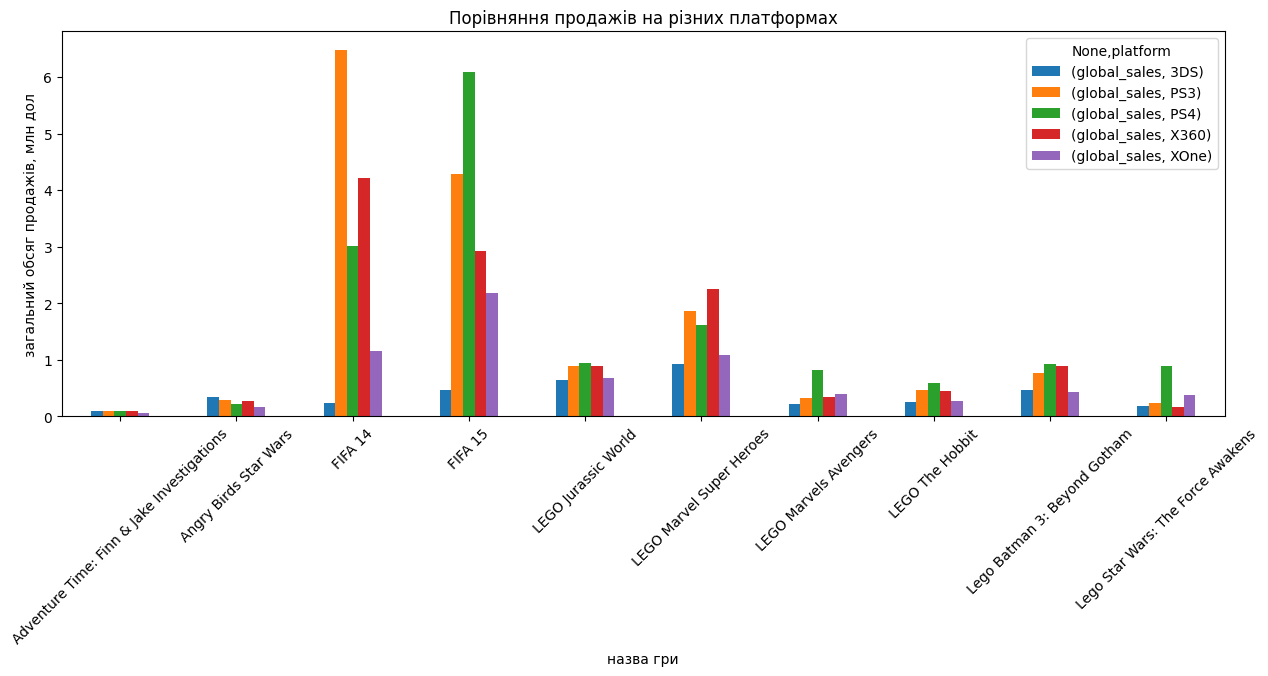

In [35]:
(df_top_platforms.pivot_table(index=['name','platform'], values='global_sales', aggfunc='sum')
                        .sort_values(by='global_sales', ascending=False).unstack(1).dropna()[0:10].plot(kind='bar', figsize=(15,5)))
plt.title('Порівняння продажів на різних платформах')
plt.xlabel('назва гри')
plt.xticks(rotation=45)
plt.ylabel('загальний обсяг продажів, млн дол');

Немає суттєвої різниці між загальними обсягами продажів кожної платформи для тих самих ігор.

#### Жанровий аналіз ігор з точки зору продажів

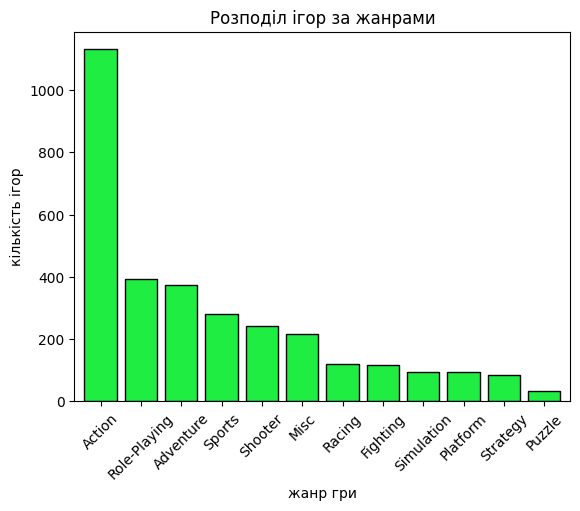

In [36]:
df_final.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar', ec='black', width=0.8, color='#1fed41')
plt.title('Розподіл ігор за жанрами')
plt.xlabel('жанр гри')
plt.xticks(rotation=45)
plt.ylabel('кількість ігор');

Екшн-ігри на сьогоднішній день є найпопулярнішими в цьому наборі даних. Тепер давайте подивимося, чи вони також найприбутковіші.

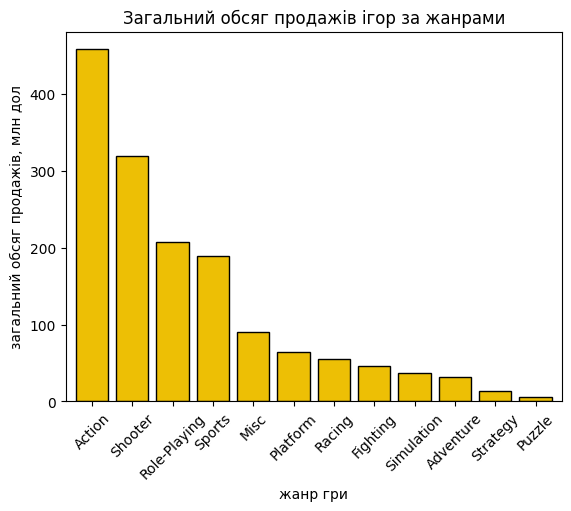

In [37]:
df_final.groupby('genre')['global_sales'].sum().sort_values(ascending=False).plot(kind='bar', ec='black', width=0.8, color='#edbf05')
plt.title('Загальний обсяг продажів ігор за жанрами')
plt.xlabel('жанр гри')
plt.xticks(rotation=45)
plt.ylabel('загальний обсяг продажів, млн дол');

Ми можемо підтвердити, що бойовики є найприбутковішими та популярними. Схоже, що загалом більш активні ігри (екшен, шутер, спорт) мають високі продажі, а більш спокійні та інтелектуальні (головоломки, стратегії) – низькі.

### Профіль користувача на регіон
#### Найпопулярніші платформи в регіоні

Спочатку давайте визначимо 5 найкращих платформ з точки зору продажів у кожному регіоні.

In [38]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = df.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'blue', 'eu_sales': 'green', 'jp_sales': 'yellow'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=30)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

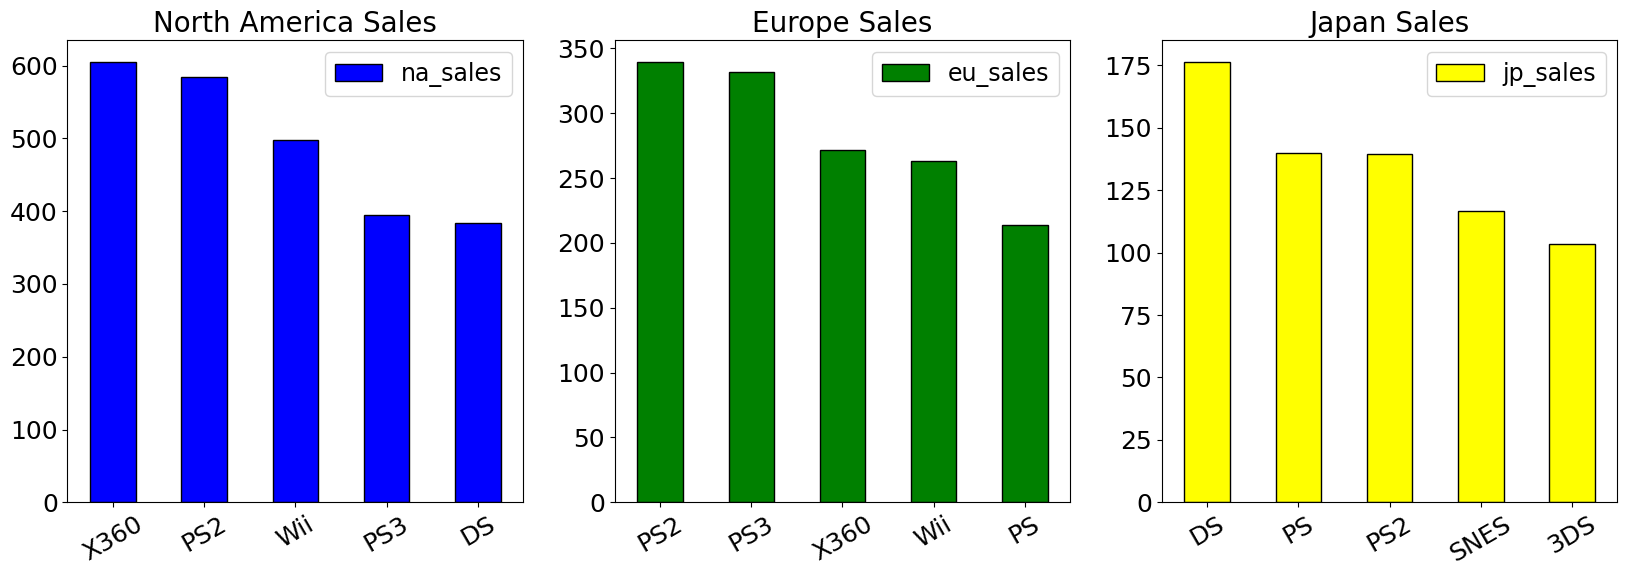

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

У Північній Америці мають(мали) велику популярність приставки минулого покоління X360 і PS2. Небагато відстає Wii. Топ-4 і топ-5 - PS3 і DS відповідно.

В Європі одинаково (були) популярні PS2 і PS3. За ними X360, Wii і PS.

В Японії, як зазвичай, все навпаки. Лідер - DS. За ними американські PS і PS2. Далі чисто японські SNES і 3DS.

#### Найпопулярніші жанри в регіоні

Далі розглянемо топ-5 жанрів за продажами в кожному регіоні.

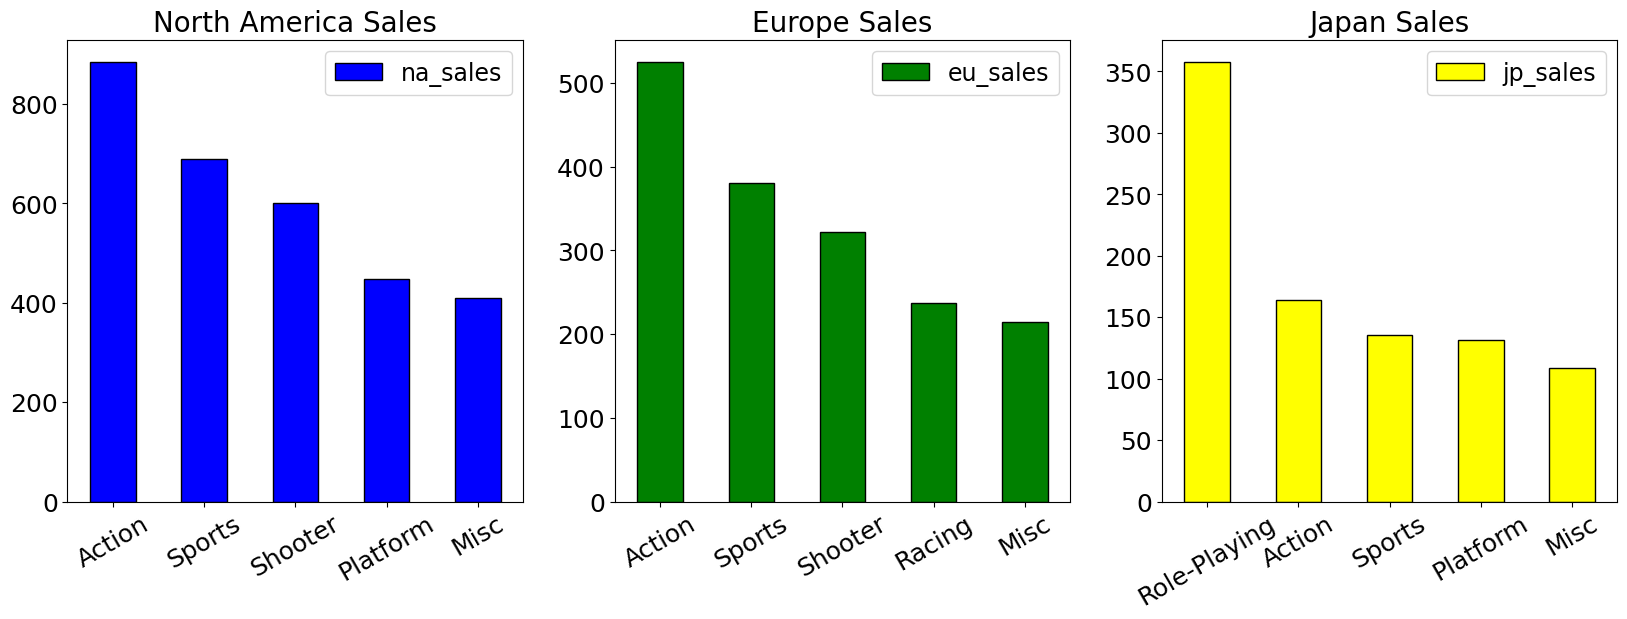

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

Вподобання в Північній Америці та Європі схожі: і там, і там живуть фанати екшенів, спортивних ігор і шутерів. У Північній Америці більше грають в платформи, в Європі ще частіше вибирають гонки.


В Японії смак інший - на першому місці рольові ігри, причому з великим відривом. Далі екшн і спортивні ігри.

#### Оцінки ESRB на регіон

Нарешті, проаналізуємо рейтинги ESRB щодо продажів у кожному регіоні.

Додаємо новий стовпчик в основний датафрейм з розясненням, яка буква рейтингу означає:

In [41]:
ESRB_dict = {'E': 'Для всіх', 'M': '> 17 років', 'T': '13-19 років', 'E10+': '>10 років', 'K-A': 'Для всіх(стар.)'}

In [42]:
df['ESRB_description'] = df[df['rating'].notnull()]['rating'].map(ESRB_dict)

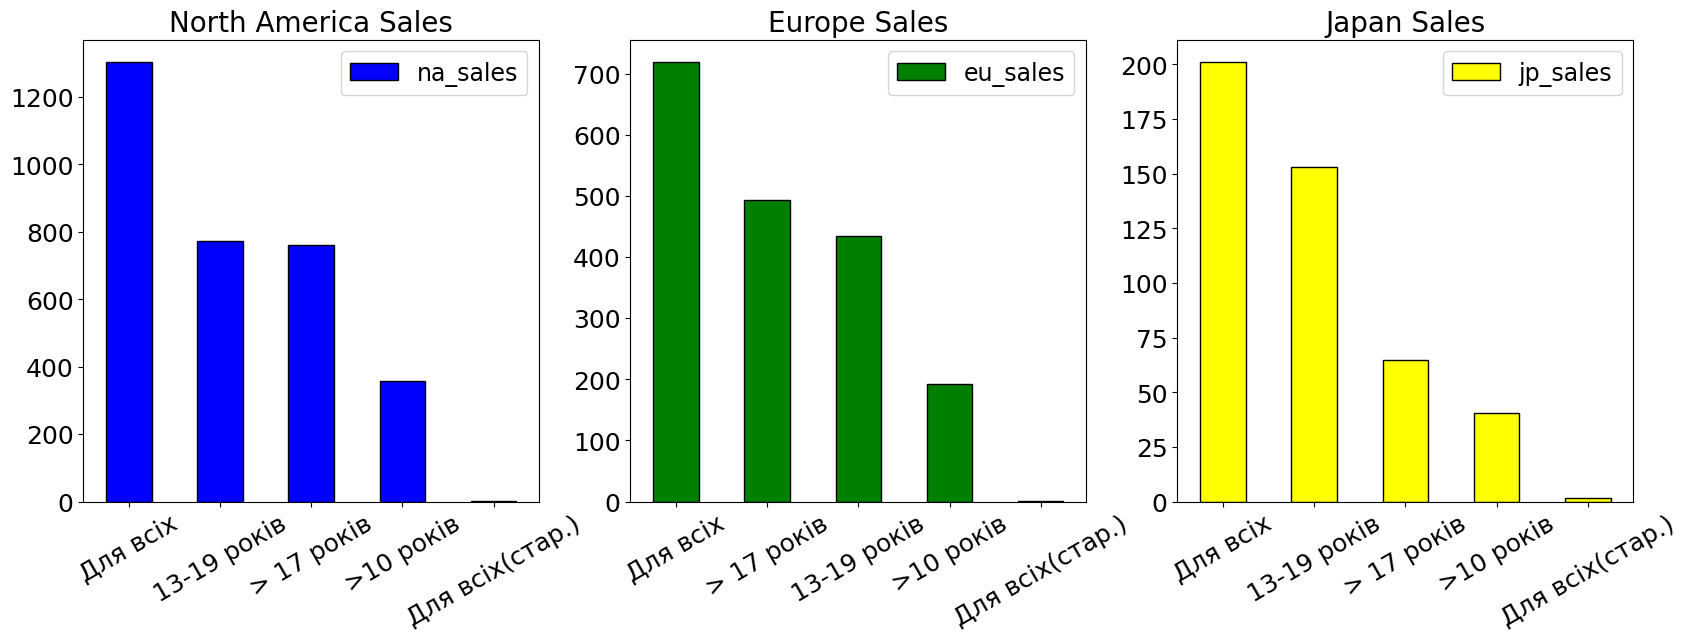

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

В Північній Америці і в Європі картина практично одинакова. Більшу частину виручки отримано з ігор з рейтингом "Для всіх", порівну - з рейтингом "13-19 років" і "для старше 17 років".

В Японії знову не так. Перше місце - "Для всіх", а ось на другому - ігри для осіб від 13 до 19 років. 

**Підсумовуючи цей розділ, типовий користувач у кожному регіоні має такі характеристики**:
- Регіон NA: доросла особа (18+), яка грає переважно в бойовики на платформі «X360» та «PS2» ;
- Регіон ЄС: доросла особа (18+), яка грає переважно в бойовики на платформі «PS2» та «PS3» ;
- Регіон JP: людина будь-якого віку, яка грає переважно в рольові ігри на платформі «DS», «PS2» та «PS3».

У ході дослідження продажів комп'ютерних ігор було вивчено отримані дані, проведено дослідницький аналіз продажів у розрізі платформ, жанрів та регіонів.

У зв'язку з тим, що платформи змінюються та їх середній час існування становить 8.5 років, для аналізу продажів по платформах було обрано період 2013-2016 років, а для аналізу інших розрізів було взято період 2010-2016 років.

Між регіонами (Північна Америка, Європа та Японія), спостерігаються деякі відмінності в уподобаннях при виборі платформи, жанру гри та рейтингу ERSB. Докладніше ці відмінності описані вище у проекті, тому тут наведу лише фінальні таблиці:

У зв'язку з цими відмінностями продукт для рекламної кампанії рекомендується вибирати індивідуально для кожного регіону з наступних категорій:

Північна Америка
Платформа: PS2/X360; Жанр: Action/Shooter; ESRB Rating: M/E

Європа
Платформа: PS2/PS3; Жанр: Action; ESRB Rating: M/E

Японія
Платформа: DS/PS2/PS3"; Жанр: Role-Playing; ESRB Rating: E/T

Списки актуальних ігор для кожного регіону, виходячи з відмінностей, озвучених вище:

In [44]:
na_recommendation_list = (df.query('platform == ["X360","PS2" ] & year_of_release == 2016 & genre == ["Action",  "Shooter"]')
                          .sort_values(by='na_sales', ascending=False))
print('NA recomedation list')
display(na_recommendation_list.head(10))

NA recomedation list


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,rating,ESRB_description
5329,LEGO Marvels Avengers,X360,2016,Action,Warner Bros. Interactive Entertainment,0.19,0.13,0.0,0.03,0.35,68.0,NaN,7.1,7.0,E10+,>10 років
8393,Lego Star Wars: The Force Awakens,X360,2016,Action,Warner Bros. Interactive Entertainment,0.07,0.08,0.0,0.01,0.17,68.0,NaN,7.1,7.0,E10+,>10 років
12114,Call of Duty: Modern Warfare Trilogy,X360,2016,Shooter,Activision,0.04,0.03,0.0,0.01,0.07,74.0,NaN,7.5,NaN,M,> 17 років
12105,Teenage Mutant Ninja Turtles: Mutants in Manha...,X360,2016,Action,Activision,0.02,0.04,0.0,0.01,0.07,71.0,NaN,7.5,16.0,T,13-19 років


In [45]:
eu_recommendation_list = (df.query('platform == ["PS2", "PS3" ] & year_of_release == 2016 & genre == ["Action",  "Shooter"]')
                          .sort_values(by='eu_sales', ascending=False))
print('EU recomedation list')
display(eu_recommendation_list.head(10))

EU recomedation list


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,rating,ESRB_description
5726,LEGO Marvels Avengers,PS3,2016,Action,Warner Bros. Interactive Entertainment,0.12,0.14,0.00,0.05,0.32,68.0,NaN,7.1,9.0,E10+,>10 років
6973,Lego Star Wars: The Force Awakens,PS3,2016,Action,Warner Bros. Interactive Entertainment,0.06,0.14,0.00,0.04,0.24,68.0,NaN,7.1,NaN,E10+,>10 років
12011,Teenage Mutant Ninja Turtles: Mutants in Manha...,PS3,2016,Action,Activision,0.02,0.03,0.00,0.01,0.07,71.0,NaN,7.5,14.0,T,13-19 років
13601,Call of Duty: Modern Warfare Trilogy,PS3,2016,Shooter,Activision,0.02,0.02,0.00,0.01,0.04,74.0,NaN,7.5,5.0,M,> 17 років
14918,Aegis of Earth: Protonovus Assault,PS3,2016,Action,PQube,0.02,0.01,0.00,0.00,0.03,71.0,NaN,7.5,NaN,T,13-19 років
16620,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
7259,MLB 16: The Show,PS3,2016,Action,Sony Computer Entertainment,0.18,0.00,0.00,0.04,0.22,NaN,NaN,NaN,NaN,NaN,NaN
9220,Dragon Quest Heroes II: Twin Kings and the Pro...,PS3,2016,Action,Square Enix,0.00,0.00,0.14,0.00,0.14,NaN,NaN,NaN,NaN,NaN,NaN
12314,Attack on Titan (KOEI),PS3,2016,Action,Tecmo Koei,0.00,0.00,0.07,0.00,0.07,NaN,NaN,NaN,NaN,NaN,NaN
13250,Kamen Rider: Battride War Genesis,PS3,2016,Action,Namco Bandai Games,0.00,0.00,0.05,0.00,0.05,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
jp_recommendation_list = (df.query('platform == ["DS","PS2", "PS3" ] & year_of_release == 2016 & genre == ["Role-Playing",  "Action"]')
                          .sort_values(by='jp_sales', ascending=False))
print('JP recomedation list')
display(jp_recommendation_list.head(10))

JP recomedation list


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,rating,ESRB_description
9220,Dragon Quest Heroes II: Twin Kings and the Pro...,PS3,2016,Action,Square Enix,0.00,0.00,0.14,0.00,0.14,NaN,NaN,NaN,NaN,NaN,NaN
9719,Dragon Quest Builders: Revive Alefgard,PS3,2016,Role-Playing,Square Enix,0.00,0.00,0.12,0.00,0.12,NaN,NaN,NaN,NaN,NaN,NaN
9722,Tales of Berseria,PS3,2016,Role-Playing,Namco Bandai Games,0.00,0.00,0.12,0.00,0.12,79.0,NaN,7.8,NaN,NaN,NaN
9865,Persona 5,PS3,2016,Role-Playing,Atlus,0.00,0.00,0.12,0.00,0.12,NaN,NaN,NaN,NaN,NaN,NaN
12314,Attack on Titan (KOEI),PS3,2016,Action,Tecmo Koei,0.00,0.00,0.07,0.00,0.07,NaN,NaN,NaN,NaN,NaN,NaN
13250,Kamen Rider: Battride War Genesis,PS3,2016,Action,Namco Bandai Games,0.00,0.00,0.05,0.00,0.05,NaN,NaN,NaN,NaN,NaN,NaN
13320,Star Ocean 5: Integrity and Faithlessness,PS3,2016,Role-Playing,Square Enix,0.00,0.00,0.05,0.00,0.05,NaN,NaN,NaN,NaN,NaN,NaN
14359,Sengoku Basara: Sanada Yukimura-Den,PS3,2016,Action,Capcom,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
11607,Odin Sphere: Leifthrasir,PS3,2016,Role-Playing,Nippon Ichi Software,0.02,0.02,0.03,0.01,0.08,71.0,NaN,7.5,30.0,T,13-19 років
14692,Toukiden 2,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
